In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Train.csv',encoding="windows-1252")
df.head()
pd.pandas.set_option('display.max_columns',None)


df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [3]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
#calculate the missing values in each column of data frame:
for feature in df.columns:
    print(feature,':',(df[feature].isnull().mean())*100,'% null values')

Item_Identifier : 0.0 % null values
Item_Weight : 17.165317376510618 % null values
Item_Fat_Content : 0.0 % null values
Item_Visibility : 0.0 % null values
Item_Type : 0.0 % null values
Item_MRP : 0.0 % null values
Outlet_Identifier : 0.0 % null values
Outlet_Establishment_Year : 0.0 % null values
Outlet_Size : 28.27642848762173 % null values
Outlet_Location_Type : 0.0 % null values
Outlet_Type : 0.0 % null values
Item_Outlet_Sales : 0.0 % null values


In [5]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [6]:
df['Item_Weight'].mode()

0    12.15
dtype: float64

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


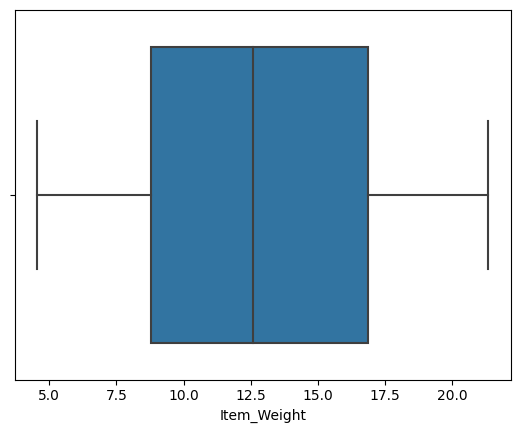

In [7]:
sns.boxplot(df['Item_Weight'])
plt.show()

In [8]:
median=df['Item_Weight'].median()
median

12.6

In [9]:
###replacing the null values with median of column
df['Item_Weight'].fillna(median,inplace=True)

In [10]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [12]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
### as there is a very high number of missing values in outlet size column....we will replace the null values with'Missing"
df['Outlet_Size'].fillna('Missing',inplace=True)

In [14]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
df['years_established']=df['Outlet_Establishment_Year'].apply(lambda x: 2022-x)

In [16]:
df.drop('Item_Visibility',axis=1,inplace=True)

In [17]:
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [18]:
numerical_features=[feature for feature in df.columns if feature not in categorical_features]
numerical_features

['Item_Weight',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales',
 'years_established']

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


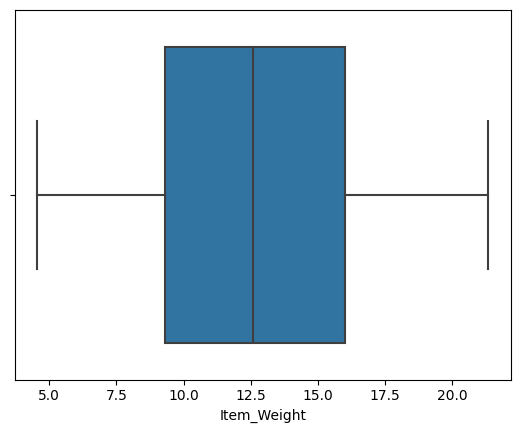

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


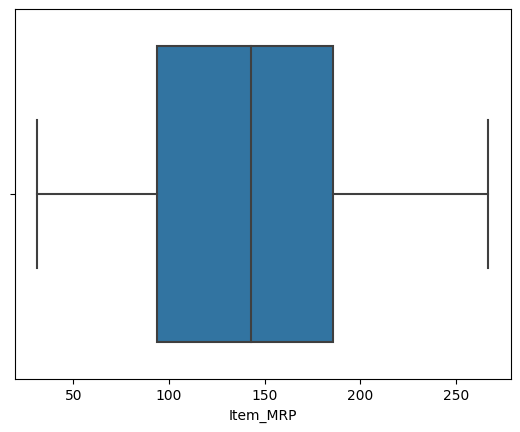

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


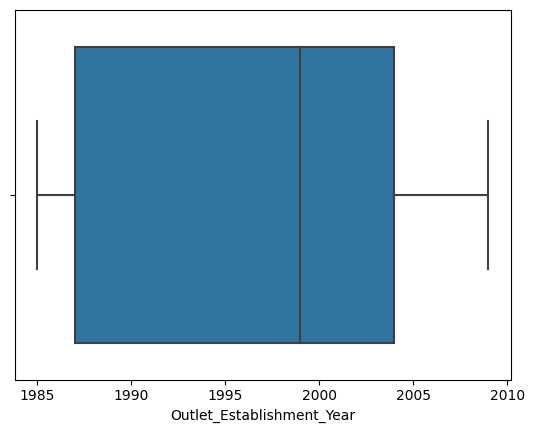

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


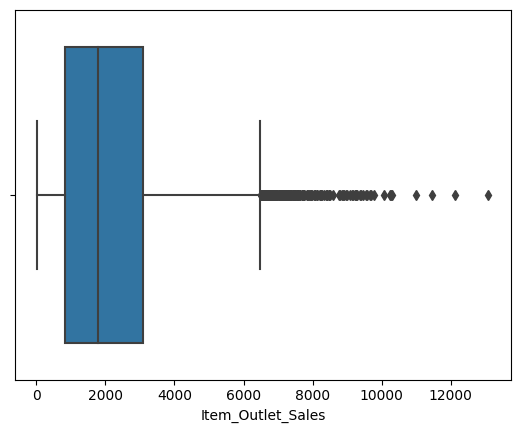

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


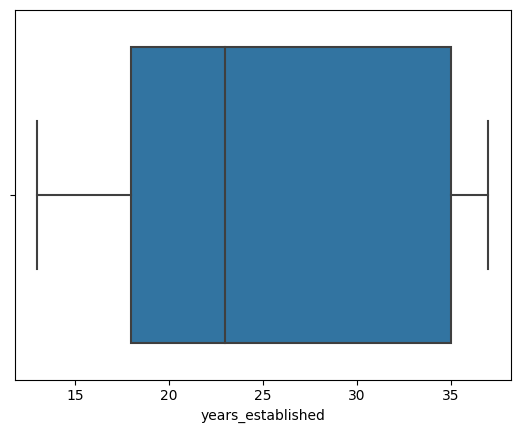

In [19]:
for feature in numerical_features:
    sns.boxplot(df[feature])
    plt.show()

In [20]:
df.describe()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,years_established
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,140.992782,1997.831867,2181.288914,24.168133
std,4.22724,62.275067,8.371760,1706.499616,8.371760
min,4.55500,31.290000,1985.000000,33.290000,13.000000
25%,9.31000,93.826500,1987.000000,834.247400,18.000000
50%,12.60000,143.012800,1999.000000,1794.331000,23.000000
75%,16.00000,185.643700,2004.000000,3101.296400,35.000000
max,21.35000,266.888400,2009.000000,13086.964800,37.000000


D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


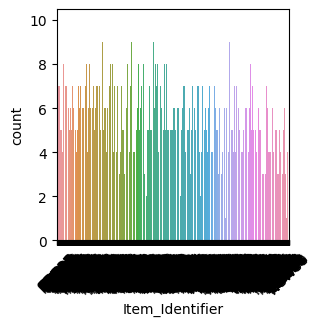

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


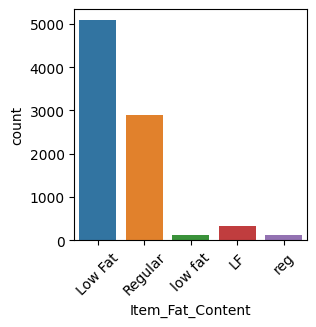

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


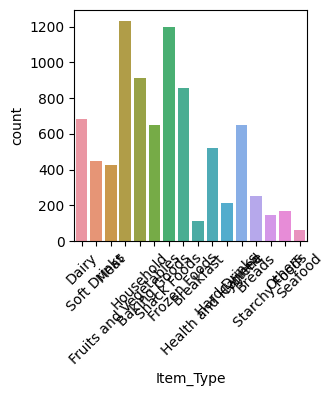

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


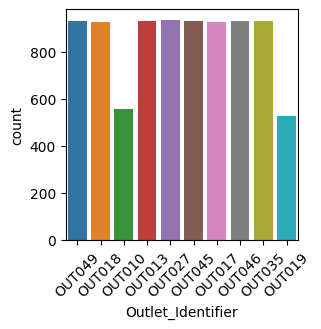

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


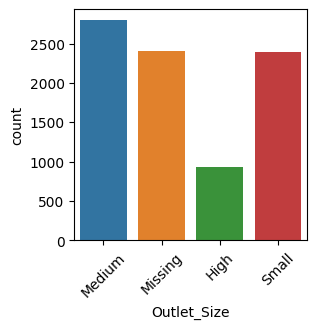

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


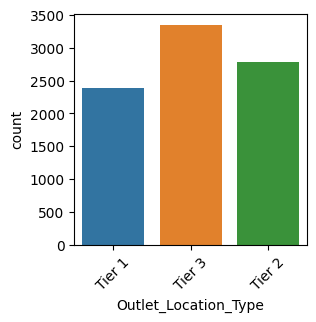

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


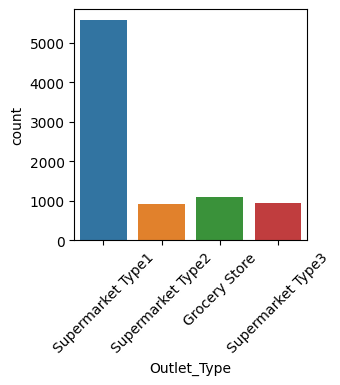

In [21]:
for feature in categorical_features:
    plt.figure(figsize=(3,3))
    sns.countplot(df[feature])
    plt.xticks(rotation=45)
    plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


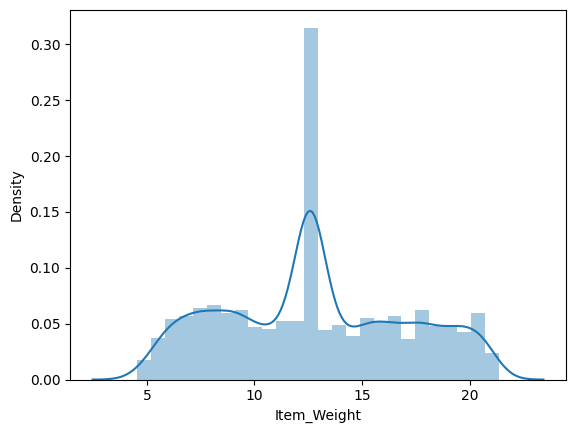

<Figure size 300x300 with 0 Axes>

In [22]:
sns.distplot(df['Item_Weight'])
plt.figure(figsize=(3,3))
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


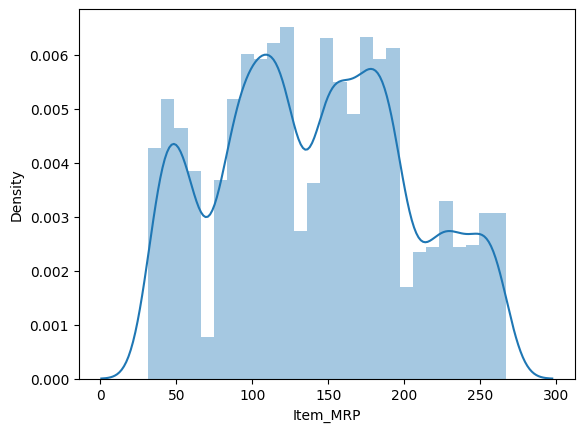

<Figure size 300x300 with 0 Axes>

In [23]:
sns.distplot(df['Item_MRP'])
plt.figure(figsize=(3,3))
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


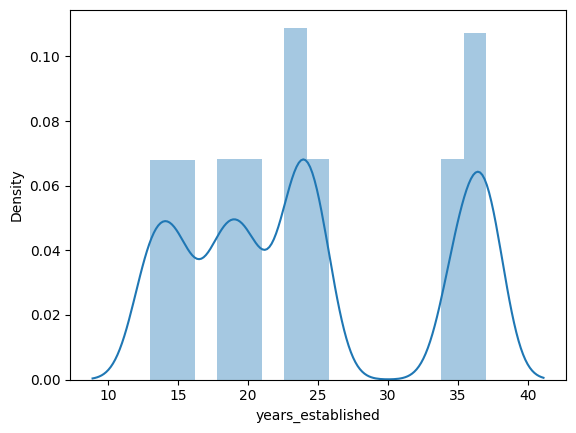

<Figure size 300x300 with 0 Axes>

In [24]:
sns.distplot(df['years_established'])
plt.figure(figsize=(3,3))
plt.show()

In [25]:
##### numerical values are showing a skewed graph so we need to normalize it using log transformation

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


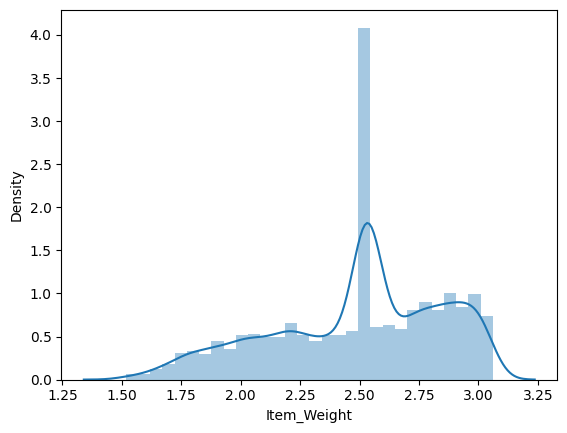

In [26]:
df['Item_Weight']=np.log(df['Item_Weight'])
sns.distplot(df['Item_Weight'])
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


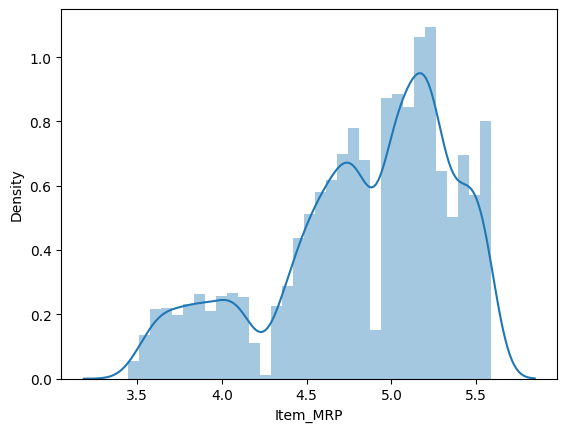

In [27]:
df['Item_MRP']=np.log(df['Item_MRP'])
sns.distplot(df['Item_MRP'])
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


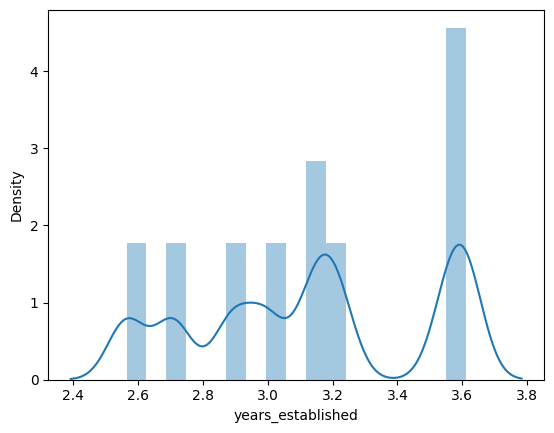

In [28]:
df['years_established']=np.log(df['years_established'])
sns.distplot(df['years_established'])
plt.show()

In [29]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,years_established
0,FDA15,2.230014,Low Fat,Dairy,5.520697,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,3.135494
1,DRC01,1.778336,Regular,Soft Drinks,3.876794,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2.564949
2,FDN15,2.862201,Low Fat,Meat,4.953133,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,3.135494
3,FDX07,2.954910,Regular,Fruits and Vegetables,5.204529,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800,3.178054
4,NCD19,2.189416,Low Fat,Household,3.986414,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,3.555348
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,1.926436,Low Fat,Snack Foods,5.368411,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,3.555348
8519,FDS36,2.125848,Regular,Baking Goods,4.683584,OUT045,2002,Missing,Tier 2,Supermarket Type1,549.2850,2.995732
8520,NCJ29,2.360854,Low Fat,Health and Hygiene,4.444090,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,2.890372
8521,FDN46,1.975469,Regular,Snack Foods,4.636021,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,2.564949


In [30]:
df.corr()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,years_established
Item_Weight,1.000000,0.018955,-0.045993,0.016776,0.041838
Item_MRP,0.018955,1.000000,0.004419,0.548289,-0.003691
Outlet_Establishment_Year,-0.045993,0.004419,1.000000,-0.049135,-0.988419
Item_Outlet_Sales,0.016776,0.548289,-0.049135,1.000000,0.038357
years_established,0.041838,-0.003691,-0.988419,0.038357,1.000000


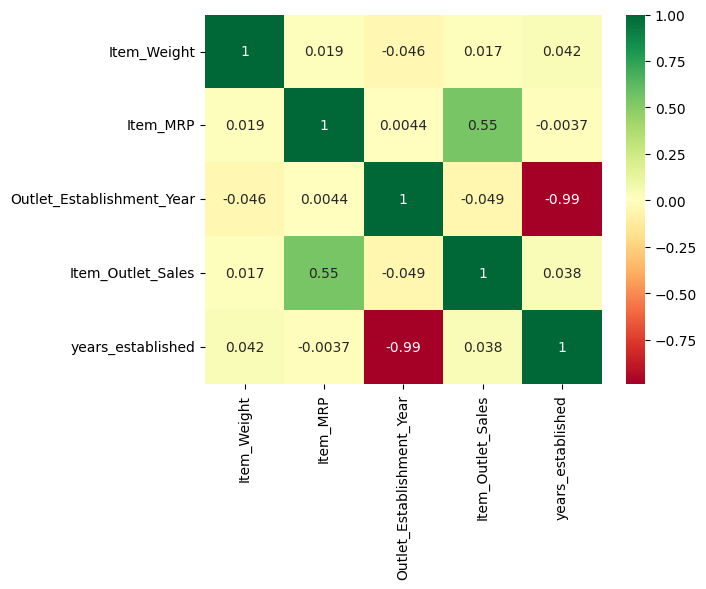

In [31]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

### Sales is higher in outlets where discounts are offered and mrp is less

In [32]:
res=pd.pivot_table(df,index='Item_Type',columns='Outlet_Size',values='Item_Outlet_Sales')
res

Outlet_Size,High,Medium,Missing,Small
Item_Type,,,,
Baking Goods,2050.901134,2386.702771,1669.153402,1724.681911
Breads,2080.731528,2718.244814,1699.029128,2158.795546
Breakfast,2104.286508,2865.085356,1623.241877,1715.988533
Canned,2211.265203,2562.075105,2017.867739,2038.457667
Dairy,2453.181713,2725.360676,1913.509200,1900.495836
Frozen Foods,2214.096189,2612.229851,1802.116163,1895.489818
Fruits and Vegetables,2405.118103,2844.100923,1921.107714,1931.258454
Hard Drinks,2363.590000,2551.079280,1754.150979,1926.518932
Health and Hygiene,1953.042439,2475.142832,1587.745880,1929.155500


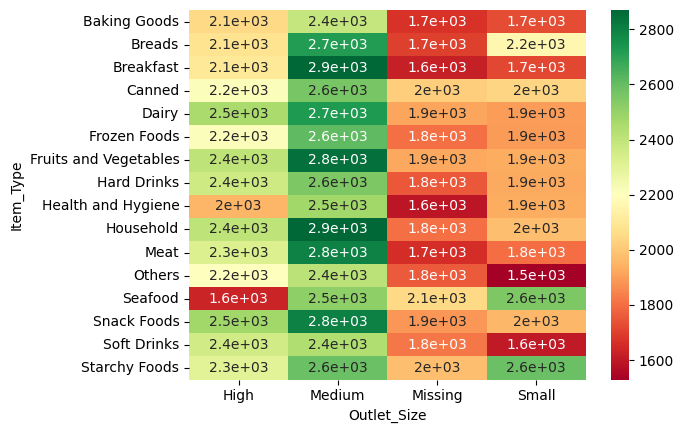

In [33]:
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()

### Sales are higher in medium sized outlets who sell snacks,meats,household,fruits and vegetables,breakfast items etc

#### there were missing values in outlet siz ecolumn because some outlets had very low sales 

In [34]:
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [35]:
df['Item_Fat_Content'].unique()###nominal categorical variable

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [36]:
df['Outlet_Identifier'].unique()###nominal categorical variable

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [37]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [38]:
df['Outlet_Location_Type'].unique()###ordinal categorical variable

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [39]:
df['Outlet_Size'].unique()###ordinal categorical variable

array(['Medium', 'Missing', 'High', 'Small'], dtype=object)

In [40]:
df['Outlet_Location_Type'].unique()###ordinal categorical variable

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [41]:
df['Outlet_Type'].unique()###ordinal categorical variable

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

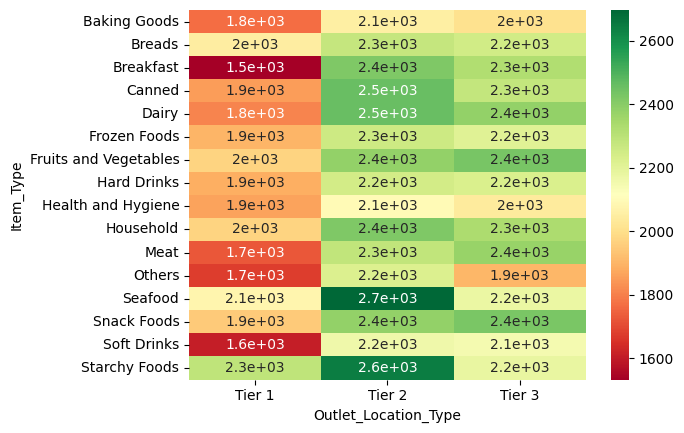

In [42]:
res1=pd.pivot_table(df,index='Item_Type',columns='Outlet_Location_Type',values='Item_Outlet_Sales')
sns.heatmap(res1,annot=True,cmap="RdYlGn")
plt.show()

### outlet sales is higher in tier 2 and tier 3 locations 

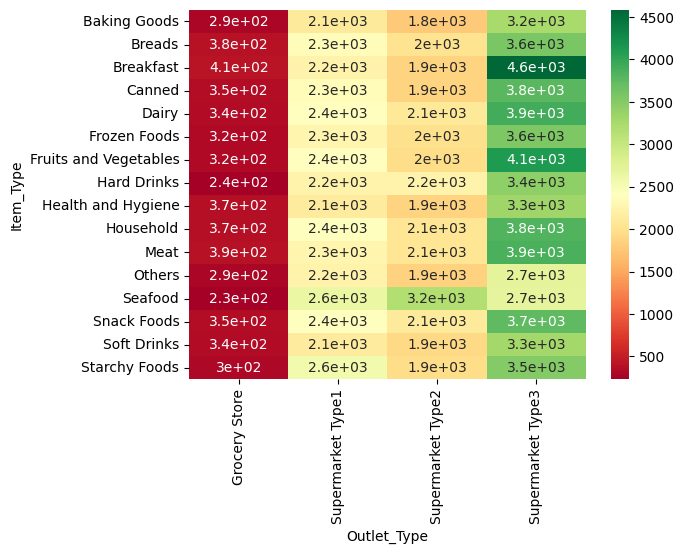

In [43]:
res2=pd.pivot_table(df,index='Item_Type',columns='Outlet_Type',values='Item_Outlet_Sales')
sns.heatmap(res2,annot=True,cmap="RdYlGn")
plt.show()

### people are prefering to go to supermarket type 3 more so sales are also more 

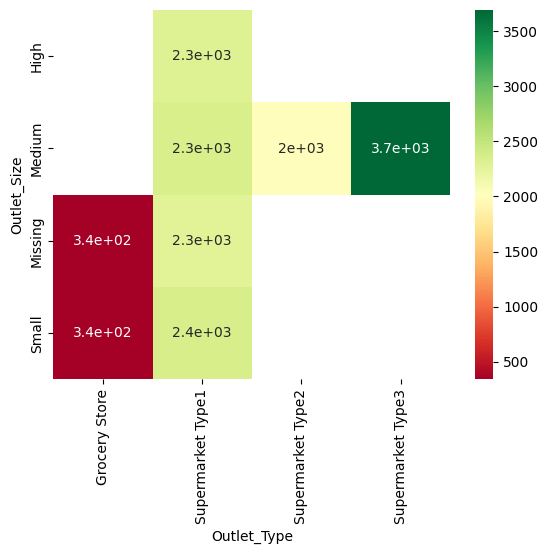

In [44]:
res3=pd.pivot_table(df,index='Outlet_Size',columns='Outlet_Type',values='Item_Outlet_Sales')
sns.heatmap(res3,annot=True,cmap="RdYlGn")
plt.show()

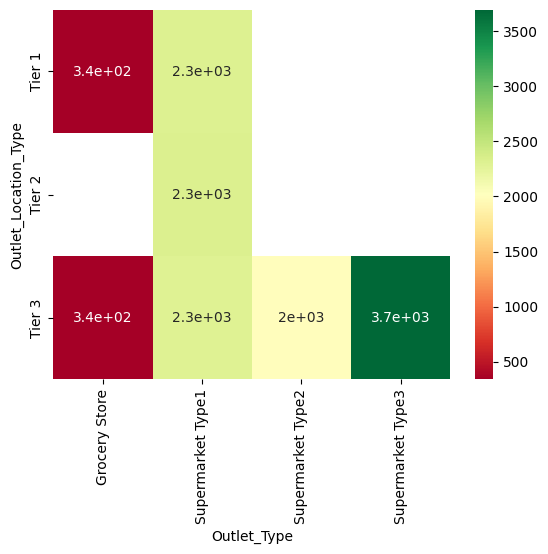

In [45]:
res4=pd.pivot_table(df,index='Outlet_Location_Type',columns='Outlet_Type',values='Item_Outlet_Sales')
sns.heatmap(res4,annot=True,cmap="RdYlGn")
plt.show()

### Super market type 3 are mainly medium sized markets which are mainly located in tier 3 cities

In [46]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,years_established
0,FDA15,2.230014,Low Fat,Dairy,5.520697,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,3.135494
1,DRC01,1.778336,Regular,Soft Drinks,3.876794,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2.564949
2,FDN15,2.862201,Low Fat,Meat,4.953133,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,3.135494
3,FDX07,2.954910,Regular,Fruits and Vegetables,5.204529,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800,3.178054
4,NCD19,2.189416,Low Fat,Household,3.986414,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,3.555348


In [47]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [48]:
df['Item_Identifier'].nunique()

1559

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
 11  years_established          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [50]:
mean_ordinal=df.groupby('Item_Identifier')['Item_Outlet_Sales'].mean().to_dict()
mean_ordinal

{'DRA12': 1843.6002,
 'DRA24': 2246.2189714285714,
 'DRA59': 2614.43015,
 'DRB01': 1518.0240000000001,
 'DRB13': 2428.8383999999996,
 'DRB24': 3050.6956,
 'DRB25': 1661.5039,
 'DRB48': 622.9034571428572,
 'DRC01': 862.2110000000001,
 'DRC12': 2237.4209,
 'DRC13': 1632.04225,
 'DRC24': 3152.8959,
 'DRC25': 1128.816342857143,
 'DRC27': 2743.4289000000003,
 'DRC36': 3011.8128800000004,
 'DRC49': 2828.3184,
 'DRD01': 851.02556,
 'DRD12': 1576.7095142857142,
 'DRD13': 1232.681142857143,
 'DRD15': 2522.811314285714,
 'DRD24': 1965.1562571428572,
 'DRD25': 1740.23475,
 'DRD27': 1269.81376,
 'DRD37': 892.1719999999999,
 'DRD49': 3634.9350999999997,
 'DRD60': 2605.2754,
 'DRE01': 2908.2144,
 'DRE03': 648.2989714285715,
 'DRE12': 1546.8753333333334,
 'DRE13': 1552.51244,
 'DRE15': 1151.1682,
 'DRE25': 1472.7495999999999,
 'DRE27': 995.0381000000001,
 'DRE37': 1890.872,
 'DRE48': 3491.0747428571426,
 'DRE49': 2681.8424,
 'DRE60': 4074.696,
 'DRF01': 1640.36475,
 'DRF03': 548.2863,
 'DRF13': 2685.

In [51]:
df['Item_Identifier_mean_ordinal']=df['Item_Identifier'].map(mean_ordinal)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,years_established,Item_Identifier_mean_ordinal
0,FDA15,2.230014,Low Fat,Dairy,5.520697,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,3.135494,5198.067050
1,DRC01,1.778336,Regular,Soft Drinks,3.876794,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2.564949,862.211000
2,FDN15,2.862201,Low Fat,Meat,4.953133,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,3.135494,1478.076000
3,FDX07,2.954910,Regular,Fruits and Vegetables,5.204529,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800,3.178054,3021.067500
4,NCD19,2.189416,Low Fat,Household,3.986414,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,3.555348,653.926567
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,1.926436,Low Fat,Snack Foods,5.368411,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,3.555348,3232.542225
8519,FDS36,2.125848,Regular,Baking Goods,4.683584,OUT045,2002,Missing,Tier 2,Supermarket Type1,549.2850,2.995732,2636.568000
8520,NCJ29,2.360854,Low Fat,Health and Hygiene,4.444090,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,2.890372,1221.521067
8521,FDN46,1.975469,Regular,Snack Foods,4.636021,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,2.564949,2067.752867


In [52]:
df.drop('Item_Identifier',axis=1,inplace=True)

In [54]:
df

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,years_established,Item_Identifier_mean_ordinal
0,2.230014,Low Fat,Dairy,5.520697,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,3.135494,5198.067050
1,1.778336,Regular,Soft Drinks,3.876794,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2.564949,862.211000
2,2.862201,Low Fat,Meat,4.953133,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,3.135494,1478.076000
3,2.954910,Regular,Fruits and Vegetables,5.204529,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800,3.178054,3021.067500
4,2.189416,Low Fat,Household,3.986414,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,3.555348,653.926567
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1.926436,Low Fat,Snack Foods,5.368411,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,3.555348,3232.542225
8519,2.125848,Regular,Baking Goods,4.683584,OUT045,2002,Missing,Tier 2,Supermarket Type1,549.2850,2.995732,2636.568000
8520,2.360854,Low Fat,Health and Hygiene,4.444090,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,2.890372,1221.521067
8521,1.975469,Regular,Snack Foods,4.636021,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,2.564949,2067.752867


In [55]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [56]:
def encoder(x):
    if x=='Low Fat' or 'low Fat' or 'LF':
        return 2
    else:
        return 1


In [57]:
df['Item_Fat_Content']=df['Item_Fat_Content'].apply(encoder)

In [58]:
items=df['Item_Type'].value_counts().to_dict()
items

{'Fruits and Vegetables': 1232,
 'Snack Foods': 1200,
 'Household': 910,
 'Frozen Foods': 856,
 'Dairy': 682,
 'Canned': 649,
 'Baking Goods': 648,
 'Health and Hygiene': 520,
 'Soft Drinks': 445,
 'Meat': 425,
 'Breads': 251,
 'Hard Drinks': 214,
 'Others': 169,
 'Starchy Foods': 148,
 'Breakfast': 110,
 'Seafood': 64}

In [59]:
df['Item_Type']=df['Item_Type'].map(items)

In [60]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [61]:
df['Outlet_Identifier']=df['Outlet_Identifier'].apply(lambda x:x[-2:])

In [382]:
df['Outlet_Size'].unique()

array(['Medium', 'Missing', 'High', 'Small'], dtype=object)

In [64]:
frequency=df['Outlet_Size'].value_counts().to_dict()
frequency

{'Medium': 2793, 'Missing': 2410, 'Small': 2388, 'High': 932}

In [65]:
df['Outlet_Size']=df['Outlet_Size'].map(frequency)

In [385]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [69]:
frequency=df['Outlet_Location_Type'].value_counts().to_dict()
frequency

{'Tier 3': 3350, 'Tier 2': 2785, 'Tier 1': 2388}

In [70]:
df['Outlet_Location_Type']=df['Outlet_Location_Type'].map(frequency)

In [73]:
frequency=df['Outlet_Type'].value_counts().to_dict()
frequency

{'Supermarket Type1': 5577,
 'Grocery Store': 1083,
 'Supermarket Type3': 935,
 'Supermarket Type2': 928}

In [74]:
df['Outlet_Type']=df['Outlet_Type'].map(frequency)

In [76]:
df.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
years_established               0
Item_Identifier_mean_ordinal    0
dtype: int64

In [77]:
df

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,years_established,Item_Identifier_mean_ordinal
0,2.230014,2,682,5.520697,49,1999,2793,2388,5577,3735.1380,3.135494,5198.067050
1,1.778336,2,445,3.876794,18,2009,2793,3350,928,443.4228,2.564949,862.211000
2,2.862201,2,425,4.953133,49,1999,2793,2388,5577,2097.2700,3.135494,1478.076000
3,2.954910,2,1232,5.204529,10,1998,2410,3350,1083,732.3800,3.178054,3021.067500
4,2.189416,2,910,3.986414,13,1987,932,3350,5577,994.7052,3.555348,653.926567
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1.926436,2,1200,5.368411,13,1987,932,3350,5577,2778.3834,3.555348,3232.542225
8519,2.125848,2,648,4.683584,45,2002,2410,2785,5577,549.2850,2.995732,2636.568000
8520,2.360854,2,520,4.444090,35,2004,2388,2785,5577,1193.1136,2.890372,1221.521067
8521,1.975469,2,1200,4.636021,18,2009,2793,3350,928,1845.5976,2.564949,2067.752867


### X and Y split

In [78]:
X=df.drop('Item_Outlet_Sales',axis=1)
X

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,years_established,Item_Identifier_mean_ordinal
0,2.230014,2,682,5.520697,49,1999,2793,2388,5577,3.135494,5198.067050
1,1.778336,2,445,3.876794,18,2009,2793,3350,928,2.564949,862.211000
2,2.862201,2,425,4.953133,49,1999,2793,2388,5577,3.135494,1478.076000
3,2.954910,2,1232,5.204529,10,1998,2410,3350,1083,3.178054,3021.067500
4,2.189416,2,910,3.986414,13,1987,932,3350,5577,3.555348,653.926567
...,...,...,...,...,...,...,...,...,...,...,...
8518,1.926436,2,1200,5.368411,13,1987,932,3350,5577,3.555348,3232.542225
8519,2.125848,2,648,4.683584,45,2002,2410,2785,5577,2.995732,2636.568000
8520,2.360854,2,520,4.444090,35,2004,2388,2785,5577,2.890372,1221.521067
8521,1.975469,2,1200,4.636021,18,2009,2793,3350,928,2.564949,2067.752867


In [79]:
Y=df['Item_Outlet_Sales']
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

### Feature Scaling

In [80]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [81]:
X

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,years_established,Item_Identifier_mean_ordinal
0,2.230014,2,682,5.520697,49,1999,2793,2388,5577,3.135494,5198.067050
1,1.778336,2,445,3.876794,18,2009,2793,3350,928,2.564949,862.211000
2,2.862201,2,425,4.953133,49,1999,2793,2388,5577,3.135494,1478.076000
3,2.954910,2,1232,5.204529,10,1998,2410,3350,1083,3.178054,3021.067500
4,2.189416,2,910,3.986414,13,1987,932,3350,5577,3.555348,653.926567
...,...,...,...,...,...,...,...,...,...,...,...
8518,1.926436,2,1200,5.368411,13,1987,932,3350,5577,3.555348,3232.542225
8519,2.125848,2,648,4.683584,45,2002,2410,2785,5577,2.995732,2636.568000
8520,2.360854,2,520,4.444090,35,2004,2388,2785,5577,2.890372,1221.521067
8521,1.975469,2,1200,4.636021,18,2009,2793,3350,928,2.564949,2067.752867


In [82]:
cols=X.columns

In [83]:
scaled_data=pd.DataFrame(scaler.transform(X),columns=cols)

In [84]:
scaled_data

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,years_established,Item_Identifier_mean_ordinal
0,-0.725202,0.0,-0.287389,1.316404,1.428267,0.139541,0.796203,-1.280270,0.726661,0.031829,2.705386
1,-1.983907,0.0,-0.981192,-1.808494,-0.797652,1.334103,0.796203,1.144929,-1.402741,-1.596265,-1.182922
2,1.036530,0.0,-1.039741,0.237521,1.428267,0.139541,0.796203,-1.280270,0.726661,0.031829,-0.630627
3,1.294886,0.0,1.322702,0.715398,-1.372083,0.020085,0.079148,1.144929,-1.331746,0.153277,0.753096
4,-0.838338,0.0,0.380067,-1.600117,-1.156671,-1.293934,-2.687970,1.144929,0.726661,1.229916,-1.369708
...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.571193,0.0,1.229024,1.026923,-1.156671,-1.293934,-2.687970,1.144929,0.726661,1.229916,0.942743
8519,-1.015486,0.0,-0.386922,-0.274866,1.141052,0.497909,0.079148,-0.279435,0.726661,-0.366992,0.408285
8520,-0.360588,0.0,-0.761634,-0.730120,0.423013,0.736822,0.037960,-0.279435,0.726661,-0.667647,-0.860700
8521,-1.434552,0.0,1.229024,-0.365278,-0.797652,1.334103,0.796203,1.144929,-1.402741,-1.596265,-0.101817


In [86]:
data=pd.concat([scaled_data,Y],axis=1)
data.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,years_established,Item_Identifier_mean_ordinal,Item_Outlet_Sales
0,-0.725202,0.0,-0.287389,1.316404,1.428267,0.139541,0.796203,-1.280270,0.726661,0.031829,2.705386,3735.1380
1,-1.983907,0.0,-0.981192,-1.808494,-0.797652,1.334103,0.796203,1.144929,-1.402741,-1.596265,-1.182922,443.4228
2,1.036530,0.0,-1.039741,0.237521,1.428267,0.139541,0.796203,-1.280270,0.726661,0.031829,-0.630627,2097.2700
3,1.294886,0.0,1.322702,0.715398,-1.372083,0.020085,0.079148,1.144929,-1.331746,0.153277,0.753096,732.3800
4,-0.838338,0.0,0.380067,-1.600117,-1.156671,-1.293934,-2.687970,1.144929,0.726661,1.229916,-1.369708,994.7052


In [87]:
data.to_csv('ready_to_train_data.csv')##data is saved to a csv file now

### Train Test Split

In [88]:
from sklearn.model_selection import train_test_split
X1, X_test, Y1, Y_test = train_test_split(scaled_data, Y, test_size=0.25, random_state=42)
X_train,Xcv,Y_train,Ycv=train_test_split(X1,Y1, test_size=0.10, random_state=42)

In [89]:
print(X_train.shape)
print(X_test.shape)

(5752, 11)
(2131, 11)


In [91]:
print(Y_train.shape)
print(Y_test.shape)

(5752,)
(2131,)


In [92]:
print(Xcv.shape)
print(Ycv.shape)

(640, 11)
(640,)


In [93]:
Xcv

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,years_established,Item_Identifier_mean_ordinal
6513,0.872558,0.0,-1.961884,0.726164,0.423013,0.736822,0.037960,-0.279435,0.726661,-0.667647,1.526182
5208,0.914464,0.0,-1.039741,-1.003918,-0.797652,1.334103,0.796203,1.144929,-1.402741,-1.596265,-0.873637
6076,0.955750,0.0,0.221985,1.313618,0.423013,0.736822,0.037960,-0.279435,0.726661,-0.667647,2.609406
1395,0.444389,0.0,0.380067,0.845662,0.423013,0.736822,0.037960,-0.279435,0.726661,-0.667647,0.207838
3727,0.606954,0.0,-1.039741,1.205283,1.428267,0.139541,0.796203,-1.280270,0.726661,0.031829,-0.128128
...,...,...,...,...,...,...,...,...,...,...,...
4644,0.098873,0.0,-0.383995,-0.090956,-0.797652,1.334103,0.796203,1.144929,-1.402741,-1.596265,-0.630627
7424,-0.232144,0.0,-0.383995,-0.787512,-1.156671,-1.293934,-2.687970,1.144929,0.726661,1.229916,-0.551813
5191,0.716252,0.0,0.221985,-0.953947,-0.869456,1.095190,0.079148,-0.279435,0.726661,-1.187916,-0.818280
4665,1.316573,0.0,-1.039741,0.627579,-0.869456,1.095190,0.079148,-0.279435,0.726661,-1.187916,0.693090


In [403]:
X_train

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,years_established,Item_Identifier_mean_ordinal
4776,0.847108,0.0,0.380067,1.366385,-0.797652,1.334103,0.744458,1.091569,0.266541,-1.596265,0.989986
7510,0.653017,0.0,1.229024,0.690929,-0.797652,1.334103,0.744458,1.091569,0.266541,-1.596265,1.659586
5828,0.065230,0.0,-1.039741,0.437091,1.428267,0.139541,0.744458,-1.369334,-0.650957,0.031829,0.194771
5327,-1.153530,0.0,-0.386922,-0.793639,0.423013,0.736822,-0.266539,-0.138882,-0.650957,-0.667647,-0.622044
4810,1.316573,0.0,0.221985,-0.062990,1.141052,0.497909,-1.277535,-0.138882,-0.650957,-0.366992,0.016155
...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.696880,0.0,1.322702,0.204563,-1.372083,0.020085,-1.277535,1.091569,2.101536,0.153277,-0.349852
5191,0.716252,0.0,0.221985,-0.953947,-0.869456,1.095190,-1.277535,-0.138882,-0.650957,-1.187916,-0.818280
5390,1.052409,0.0,-0.761634,1.219223,1.141052,0.497909,-1.277535,-0.138882,-0.650957,-0.366992,2.464785
860,1.456992,0.0,1.229024,-0.110157,-0.869456,1.095190,-1.277535,-0.138882,-0.650957,-1.187916,-0.854019


## Applying all algorithms on Xcv and Ycv

In [94]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error

#### Grid Search cv of Linear regression on Cross validation data

In [95]:
from sklearn.model_selection import GridSearchCV 
param_grid={'fit_intercept':[True,False],
    'normalize':[True,False],
    'copy_X':[True,False],
}
print(param_grid)

{'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]}


In [96]:
##fitting the grid search to data
lr=LinearRegression()
lr_grid_search=GridSearchCV(estimator=lr,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)
lr_grid_search.fit(Xcv,Ycv)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [97]:
best_grid=lr_grid_search.best_estimator_
best_grid

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

#### Using best parameters of grid search(Linear Regression) to train X_train and Y_train

In [100]:
param_grid={'fit_intercept':[True],
    'normalize':[True],
    'copy_X':[True],
    'n_jobs':[None]
            
}
print(param_grid)

{'fit_intercept': [True], 'normalize': [True], 'copy_X': [True], 'n_jobs': [None]}


In [101]:
lr=LinearRegression()
lr_grid_search=GridSearchCV(estimator=lr,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)
lr_grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'n_jobs': [None], 'normalize': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [103]:
y_pred=best_grid.predict(X_test)
print('R2 score:',r2_score(Y_test,y_pred))



R2 score: 0.6060607365291295


### R2 score using Linear Regression is 0.60

#### Ridge

In [105]:
ridge=Ridge()
ridge.fit(X_train,Y_train)
y_pred_ridge=ridge.predict(X_test)

In [107]:
print(' Ridge R2 score',r2_score(Y_test,y_pred_ridge))


 Ridge R2 score 0.6062029714663265


#### using grid search cv on Xcv and Ycv

In [108]:
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'copy_X':[True,False],
    'max_iter':[100,200],
    'tol':[1e-3],
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'random_state':[2]
}
print(param_grid)

{'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100], 'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False], 'max_iter': [100, 200], 'tol': [0.001], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], 'random_state': [2]}


In [109]:
###fitting data to the grid seach
ridge=Ridge()
ridge_grid_search=GridSearchCV(estimator=ridge,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)
ridge_grid_search.fit(Xcv,Ycv)

Fitting 5 folds for each of 1792 candidates, totalling 8960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 2928 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 8960 out of 8960 | elapsed:   29.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False], 'max_iter': [100, 200],
                         'normalize': [True, False], 'random_state': [2],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga'],
                         'tol': [0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [110]:
best_ridge_grid=ridge_grid_search.best_estimator_

In [111]:
best_ridge_grid

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100,
      normalize=False, random_state=2, solver='sag', tol=0.001)

#### Using  best parameters to train X_train and Y_train

In [114]:
param_grid={'fit_intercept':[True],
    'normalize':[False],
    'copy_X':[True],
    'alpha':[0.1],
    'max_iter':[100],
    'solver':['sag'],
    'tol':[0.001],
    'random_state':[2]
            
}
print(param_grid)

{'fit_intercept': [True], 'normalize': [False], 'copy_X': [True], 'alpha': [0.1], 'max_iter': [100], 'solver': ['sag'], 'tol': [0.001], 'random_state': [2]}


In [115]:
ridge=Ridge()
ridge_grid_search=GridSearchCV(estimator=ridge,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)
ridge_grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.1], 'copy_X': [True],
                         'fit_intercept': [True], 'max_iter': [100],
                         'normalize': [False], 'random_state': [2],
                         'solver': ['sag'], 'tol': [0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [116]:
best_ridge_grid=ridge_grid_search.best_estimator_
best_ridge_grid

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
      random_state=2, solver='sag', tol=0.001)

In [118]:
y_pred=best_ridge_grid.predict(X_test)
print('R2 score:',r2_score(Y_test,y_pred))


R2 score: 0.6060716168071469


### R2 score using Ridge is 0.60

#### Lasso

#### using grid search cv on Xcv and Ycv for hyperparameter tuning

In [119]:
lasso=Lasso()
lasso.fit(X_train,Y_train)
y_pred_lasso=lasso.predict(X_test)

print(' lasso R2 score',r2_score(_test,y_pred_lasso))



 lasso R2 score 0.606234450527328


In [120]:
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

In [121]:
lasso=Lasso()
lasso_grid_search=GridSearchCV(estimator=lasso,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)
lasso_grid_search.fit(Xcv,Ycv)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.5s finished
D:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 379817824.2466096, tolerance: 201789.70839141056
  positive)


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [122]:
best_lasso_grid=lasso_grid_search.best_estimator_
best_lasso_grid

Lasso(alpha=1e-15, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [126]:
param_grid={'fit_intercept':[True],
    'normalize':[False],
    'copy_X':[True],
    'alpha':[1e-15],
    'max_iter':[1000],
    'tol':[0.0001],
    'random_state':[None],
    'positive':[False],
    'precompute':[False],
    'selection':['cyclic'],
    'warm_start':[False]
            
            
}
print(param_grid)

{'fit_intercept': [True], 'normalize': [False], 'copy_X': [True], 'alpha': [1e-15], 'max_iter': [1000], 'tol': [0.0001], 'random_state': [None], 'positive': [False], 'precompute': [False], 'selection': ['cyclic'], 'warm_start': [False]}


In [127]:
lasso=Lasso()
lasso_grid_search=GridSearchCV(estimator=lasso,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)
lasso_grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished
D:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3237810148.1091247, tolerance: 1689678.2420483606
  positive)


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-15], 'copy_X': [True],
                         'fit_intercept': [True], 'max_iter': [1000],
                         'normalize': [False], 'positive': [False],
                         'precompute': [False], 'random_state': [None],
                         'selection': ['cyclic'], 'tol': [0.0001],
                         'warm_start': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [128]:
y_pred=best_lasso_grid.predict(X_test)
print(' lasso R2 score',r2_score(Y_test,y_pred))


 lasso R2 score 0.5901088093683502


### R2 score using Lasso is 0.59

#### KNeighbours Regressor

In [129]:
knr = KNeighborsRegressor(n_neighbors=19)
knr.fit(X_train,Y_train)
y_pred_knr=knr.predict(X_test)

print(' knr R2 score',r2_score(Y_test,y_pred_knr))


 knr R2 score 0.645351836392408


#### using grid search cv on Xcv and Ycv for hyperparameter tuning

In [131]:
param_grid={'n_neighbors':[x for x in range(1,20)],
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'leaf_size':[30],
    'p':[1,2],
    'metric':['minkowski','euclidean','manhattan']
}
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [30], 'p': [1, 2], 'metric': ['minkowski', 'euclidean', 'manhattan']}


In [132]:
knr = KNeighborsRegressor()
knr_grid_search=GridSearchCV(estimator=knr,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)
knr_grid_search.fit(Xcv,Ycv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 912 candidates, totalling 4560 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 1712 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 4560 out of 4560 | elapsed:   19.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [133]:
best_knr_grid=knr_grid_search.best_estimator_
best_knr_grid

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='distance')

In [136]:
param_grid=dict(algorithm=['auto'], leaf_size=[30], metric=['minkowski'],
                    metric_params=[None], n_jobs=[None], n_neighbors=[11], p=[2],
                    weights=['distance'])
print(param_grid)

{'algorithm': ['auto'], 'leaf_size': [30], 'metric': ['minkowski'], 'metric_params': [None], 'n_jobs': [None], 'n_neighbors': [11], 'p': [2], 'weights': ['distance']}


In [137]:
knr = KNeighborsRegressor()
knr_grid_search=GridSearchCV(estimator=knr,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)
knr_grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto'], 'leaf_size': [30],
                         'metric': ['minkowski'], 'metric_params': [None],
                         'n_jobs': [None], 'n_neighbors': [11], 'p': [2],
                         'weights': ['distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [138]:
y_pred=best_knr_grid.predict(X_test)
print(' knr R2 score',r2_score(Y_test,y_pred))


 knr R2 score 0.6285671061419554


### Accuracy using Kneighbors Regressor is 0.64

#### SVM

In [140]:
svr = SVR()
svr.fit(X_train,Y_train)
y_pred_svr=svr.predict(X_test)

print(' svr R2 score',r2_score(Y_test,y_pred_svr))


 svr R2 score 0.10928039325276018


#### using grid searchcv for hyperparameter tuning for svr

In [141]:
param_grid={'kernel':[ 'linear', 'poly', 'rbf', 'sigmoid'],
    'degree':[x for x in range(1,12)],
    'gamma':['scale', 'auto'],
    'C':[1,100,200,300,400,500,600,700],
}
print(param_grid)

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'gamma': ['scale', 'auto'], 'C': [1, 100, 200, 300, 400, 500, 600, 700]}


In [142]:
svr = SVR()
svr_grid_search=GridSearchCV(estimator=svr,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)
svr_grid_search.fit(Xcv,Ycv)


Fitting 5 folds for each of 704 candidates, totalling 3520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 1388 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 2520 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 3520 out of 3520 | elapsed:   49.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 100, 200, 300, 400, 500, 600, 700],
                         'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [143]:
best_svr_grid=svr_grid_search.best_estimator_
best_svr_grid

SVR(C=700, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [144]:
param_grid=dict(C=[700], cache_size=[200], coef0=[0.0], degree=[1], epsilon=[0.1], gamma=['scale'],
    kernel=['rbf'], max_iter=[-1], shrinking=[True], tol=[0.001], verbose=[False])
print(param_grid)

{'C': [700], 'cache_size': [200], 'coef0': [0.0], 'degree': [1], 'epsilon': [0.1], 'gamma': ['scale'], 'kernel': ['rbf'], 'max_iter': [-1], 'shrinking': [True], 'tol': [0.001], 'verbose': [False]}


In [151]:
svr = SVR()
svr_grid_search=GridSearchCV(estimator=svr,param_grid=param_grid,cv=20,verbose=2,n_jobs=-1)
svr_grid_search.fit(X_train,Y_train)

Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   19.9s finished


GridSearchCV(cv=20, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [700], 'cache_size': [200], 'coef0': [0.0],
                         'degree': [1], 'epsilon': [0.1], 'gamma': ['scale'],
                         'kernel': ['rbf'], 'max_iter': [-1],
                         'shrinking': [True], 'tol': [0.001],
                         'verbose': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [152]:
best_svr_grid=svr_grid_search.best_estimator_
best_svr_grid

SVR(C=700, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [153]:
y_pred=best_svr_grid.predict(X_test)
print(' svr R2 score',r2_score(Y_test,y_pred))


 svr R2 score 0.6610972258326536


### R2 score using SVR is 0.66


### Using cross val score

In [154]:
from sklearn.model_selection import cross_val_score

In [157]:
lr_score1=cross_val_score(LinearRegression(),scaled_data,Y,cv=5)

In [158]:
lr_score1

array([0.61554816, 0.61428332, 0.59757575, 0.60620796, 0.63056402])

In [159]:
lr_model_score=np.average(lr_score1)
lr_model_score

0.6128358419004871

In [160]:
ridge_score1=cross_val_score(Ridge(),scaled_data,Y,cv=5)
ridge_model_score=np.average(ridge_score1)
ridge_model_score

0.6128007635161332

In [161]:
lasso_score1=cross_val_score(Lasso(),scaled_data,Y)
lasso_model_score=np.average(lasso_score1)
lasso_model_score

0.6127029049175203

In [162]:
knr_score1=cross_val_score(KNeighborsRegressor(n_neighbors=19),scaled_data,Y,cv=5)
knr_model_score=np.average(knr_score1)
knr_model_score

0.6466163662439325

In [164]:
svr_score1=cross_val_score(SVR,scaled_data,Y,cv=5)
svr_model_score=np.average(knr_score1)
svr_model_score

TypeError: Cannot clone object '<class 'sklearn.svm._classes.SVR'>' (type <class 'abc.ABCMeta'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

In [ ]:
import pickle


In [ ]:
file=open('model.pkl','wb')


In [ ]:
pickle.dump(svr_grid_search,file)